In [ ]:
"""Code snippets have been referenced from https://www.datacamp.com/community/tutorials/scikit-learn-fake-news"""

In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer


In [13]:
import itertools
from platform import python_version

print(python_version())

3.6.6


In [11]:
import matplotlib
from matplotlib import pyplot as plt


In [16]:
import pickle
import flask

print(pickle.__version__)
print(flask.__version__)

AttributeError: module 'pickle' has no attribute '__version__'

In [12]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)

0.23.4
1.18.1
0.20.1
3.0.2


In [4]:

df = pd.read_csv("fake_or_real_news-2.csv")

df1 = pd.read_csv("allhere.csv")   
# checking the head of dataframe
df.head()
print(df1.head())

   Unnamed: 0                                              title label  \
0           1  Another Terrorist Attack in NYC...Why Are we S...  REAL   
1           2  Trump: Drugs a 'Very, Very Big Factor' in Char...  REAL   
2           3  Obama To UN: 'Giving Up Liberty, Enhances Secu...  REAL   
3           4  Trump vs. Clinton: A Fundamental Clash over Ho...  REAL   
4           5           President Obama Vetoes 9/11 Victims Bill  REAL   

   platform  
0  buzzfeed  
1  buzzfeed  
2  buzzfeed  
3  buzzfeed  
4  buzzfeed  


In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# shape of df
df.shape

(6335, 4)

In [7]:
# shape of df
df1.shape

(1169, 4)

In [8]:
df = df.set_index("Unnamed: 0")
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
df.columns = ["title","text","label"]

In [10]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [11]:
df = df[['Unnamed: 0','title','label']]

KeyError: "['Unnamed: 0'] not in index"

In [ ]:
df1.head()

In [12]:
df1 = df1[['Unnamed: 0','title','label']]

In [13]:
df = df.append(df1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
# Set `y` 
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['title'], y, test_size=0.20, random_state=53)

In [15]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [16]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [17]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['آمریکا', 'ارزی', 'القادمون', 'ایران', 'جنگ', 'سال', 'علیه', 'مطالعاتی', 'مورد', 'کدآمایی']
['00', '000', '00pm', '01', '04', '05', '05pc', '10', '100', '1000']


In [18]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['آمریکا', 'ارزی', 'القادمون', 'ایران', 'جنگ', 'سال', 'علیه', 'مطالعاتی', 'مورد', 'کدآمایی']


In [19]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [20]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [21]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [22]:
print(count_df.equals(tfidf_df))

False


In [23]:
count_df.head()

,00,000,00pm,01,04,05,05pc,10,100,1000,...,آمریکا,ارزی,القادمون,ایران,جنگ,سال,علیه,مطالعاتی,مورد,کدآمایی
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
tfidf_df.head()

,00,000,00pm,01,04,05,05pc,10,100,1000,...,آمریکا,ارزی,القادمون,ایران,جنگ,سال,علیه,مطالعاتی,مورد,کدآمایی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265792,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [27]:
clf = MultinomialNB() 

accuracy:   0.793
Confusion matrix, without normalization


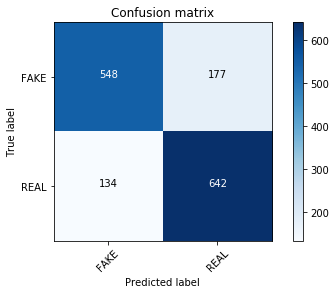

In [28]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
clf = MultinomialNB() 

accuracy:   0.788
Confusion matrix, without normalization


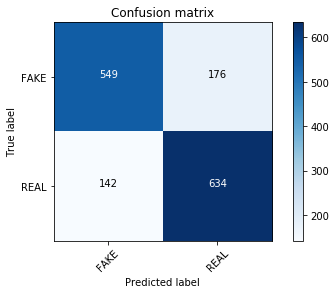

In [30]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [32]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


accuracy:   0.736
Confusion matrix, without normalization


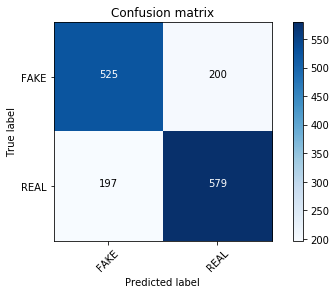

In [33]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [34]:
clf = MultinomialNB(alpha=0.1)

In [35]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.72219
Alpha: 0.10 Score: 0.76815
Alpha: 0.20 Score: 0.77482
Alpha: 0.30 Score: 0.77881
Alpha: 0.40 Score: 0.78281
Alpha: 0.50 Score: 0.78614
Alpha: 0.60 Score: 0.78748
Alpha: 0.70 Score: 0.79014
Alpha: 0.80 Score: 0.79081
Alpha: 0.90 Score: 0.79147


In [36]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -8.543681679008728 truthfeed
FAKE -6.120446787384758 noncitizen
FAKE -5.739244926945105 comment
FAKE -5.491285619419769 disparity
FAKE -5.480643464854321 soros
FAKE -5.452740662685771 anxiety
FAKE -5.385816199127391 certainly
FAKE -5.239595354810037 breitbart
FAKE -5.0417272394315376 ww3
FAKE -4.8434770437256915 feminism
FAKE -4.784671527677145 demise
FAKE -4.750909660295727 operation
FAKE -4.628962010202442 instances
FAKE -4.62297146728275 iii
FAKE -4.465484538975611 bonuses
FAKE -4.447163140275774 podesta
FAKE -4.4011625627283015 privacy
FAKE -4.3729027392438695 guard
FAKE -4.32983489060076 insurrection
FAKE -4.292246420138673 suspend
FAKE -4.276186437759224 cheat
FAKE -4.26666072072648 alcohol
FAKE -4.220398757222374 coward
FAKE -4.181677862204008 michelle
FAKE -4.132903311378922 greatest
FAKE -4.118785031742542 multiple
FAKE -4.094240858297233 creepy
FAKE -4.069936592095147 recorded
FAKE -4.0621373401391745 breaking
FAKE -4.05158844644067 mosul

REAL 5.820888860722646 debate
R

In [37]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [45]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.742
Confusion matrix, without normalization


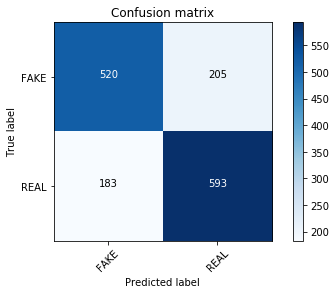

In [48]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [51]:
#Saving pkl of passive aggressive classifier
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "/Users/tejeshbatapati/Desktop/text_all_sources.pkl"

outfile = open(pkl_filename,'wb')
pickle.dump(clf,outfile)
outfile.close()
#with open(pkl_filename, 'wb') as file:
 #   pickle.dump(clf, file)

In [40]:
clf = MultinomialNB(alpha=.90)

accuracy:   0.797
Confusion matrix, without normalization


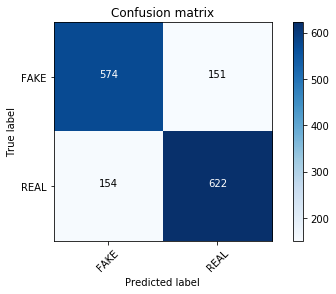

In [41]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [42]:
df_a = pd.read_csv("awetest2.csv")
df_a = df_a[0:10]
df_a = df_a.set_index("X")
y_a = df_a.label 

# Drop the `label` column
df_a.drop("label", axis=1)

# Make training and test sets 
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df_a['title'], y_a, test_size=0,random_state=1)


test_me = hash_vectorizer.transform(X_train_a)
pred = clf.predict(test_me)
score = accuracy_score(y_train_a, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.800


/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [43]:
X_train_a

X
3     My mom took that picture in August when we wer...
10    Ford Motor CEO Says Trump Is Lying AGAIN! Comp...
7     State Of Minnesota Has Just Handed Over FULL C...
5     BREAKING: Barrels Removed From Clinton Propert...
1     What happens when you give 4chan Pictures of t...
4     A picture someone took of a shark swimming by ...
2     New photo of what seems to be Boston bombing s...
8     KISS' Gene Simmons: "You Want to Win the War o...
9     Kerry says Syrian diplomacy at impasse after t...
6     BREAKING: Johnny Depp Taken Into Custody By Se...
Name: title, dtype: object

In [44]:
pred

array(['REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype='<U4')

In [55]:
X_train_a[1]

'What happens when you give 4chan Pictures of the Boston Bombing?'

In [56]:
test_me[1]

<1x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [59]:
model_json = clf.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/Users/tejeshbatapati/Desktop/fnd.h5")
print("Saved model to disk")

AttributeError: 'PassiveAggressiveClassifier' object has no attribute 'to_json'